In [1]:
#Get the data (20K dataset with numbers replaced with @)
data_dir = "pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [2]:
import os 
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [3]:
def get_lines(filename):
    
    with open(filename,"r") as f:
        return f.readlines()

In [4]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [5]:
len(train_lines)

210040

In [6]:
def preprocess(filename):
    #returns dictionaries
    input_lines = get_lines(filename)
    abstract_lines = ""
    abstract_samples = []
    
    for line in input_lines:
        if line.startswith("###"):
            abstract_is = line
            abstract_lines = ""
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()
            
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = abstract_line.split("\t")
                line_data["line_number"] = abstract_line_number
                line_data["target"] = target_text_split[0]
                line_data["text"] = target_text_split[1].lower()
                
                line_data["total_lines"] = len(abstract_line_split) - 1
                abstract_samples.append(line_data)
        else:
            abstract_lines+=line
            
    return abstract_samples

In [7]:
#get sata
train_samples = preprocess(data_dir + "train.txt")
val_samples = preprocess(data_dir + "dev.txt")
test_samples = preprocess(data_dir + "test.txt")

In [8]:
train_samples[:15]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [9]:
import pandas as pd
import numpy as np

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)

In [10]:
train_df

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
...,...,...,...,...
180035,7,RESULTS,for the absolute change in percent atheroma vo...,11
180036,8,RESULTS,"for pav , a significantly greater percentage o...",11
180037,9,RESULTS,both strategies had acceptable side effect pro...,11
180038,10,CONCLUSIONS,"compared with standard statin monotherapy , th...",11


In [11]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

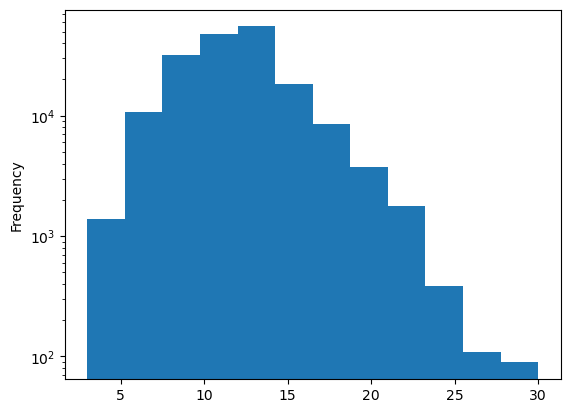

In [12]:
import matplotlib.pyplot as plt
train_df.total_lines.plot.hist(bins=12)
plt.yscale("log")

In [13]:
test_df[:10]

,line_number,target,text,total_lines
0,0,BACKGROUND,this study analyzed liver function abnormaliti...,8
1,1,RESULTS,a post hoc analysis was conducted with the use...,8
2,2,RESULTS,liver function tests ( lfts ) were measured at...,8
3,3,RESULTS,survival analyses were used to assess the asso...,8
4,4,RESULTS,the percentage of patients with abnormal lfts ...,8
5,5,RESULTS,when mean hemodynamic profiles were compared i...,8
6,6,RESULTS,multivariable analyses revealed that patients ...,8
7,7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,8
8,8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8
9,0,BACKGROUND,minimally invasive endovascular aneurysm repai...,12


In [14]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df['text'].tolist()

In [15]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [16]:
#Making nymberic labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False) # we want non-sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# check what one hot encoded labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_label_encoded = label_encoder.transform(test_df["target"].to_numpy())

# check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [18]:
import tensorflow as tf

In [19]:
#Get class
num_class = len(label_encoder.classes_)
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## MODEL 0

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences,y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
#evaluate
model_0.score(X=val_sentences,y=val_labels_encoded)
#val_sentences[:10], len(val_labels_encoded)

0.7218323844829869

In [22]:
baseline_preds = model_0.predict(val_sentences)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(val_labels_encoded,baseline_preds))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56      3449
           1       0.65      0.59      0.61      4582
           2       0.72      0.87      0.79      9964
           3       0.75      0.14      0.23      2376
           4       0.76      0.86      0.81      9841

    accuracy                           0.72     30212
   macro avg       0.71      0.59      0.60     30212
weighted avg       0.72      0.72      0.70     30212



In [24]:
from helper_functions import calculate_results

In [25]:
baseline_results = calculate_results(val_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 1

In [26]:
from tensorflow.keras import layers

In [27]:
#How long is each sentence on average?
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

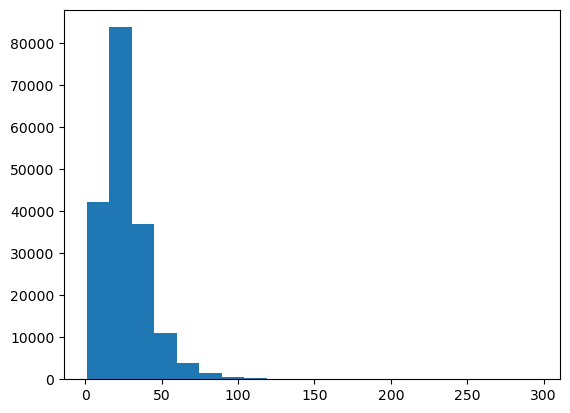

In [28]:
plt.hist(sent_len,bins=20)

In [29]:
#percentiles
output_seq_len = int(np.percentile(sent_len,97.5))
output_seq_len

65

In [30]:
#text vectorizer
max_tokens = 68000

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens = max_tokens, output_sequence_length = output_seq_len)

In [31]:
text_vectorizer.adapt(train_sentences)

In [32]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
based upon the emerging role of radiotherapy as an immunologic modifier , we designed a randomized phase ii trial adding radiotherapy and/or preleukapheresis ifn - to our dc vaccine in metastatic melanoma patients .

Length of text: 34

Vectorized text: [[  261  1864     2  4036   546     4  1053    25    26  6184 18358    43
    560     8    29   209   378    32  1697  1053   727 35368  2655     6
    246  4792   497     5  1321  2706    12     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]


In [33]:
# How many words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [34]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 65,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [35]:
#token_embedding
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                              output_dim=128,
                              mask_zero=True,
                              name="Token_Embedding")

In [36]:
# Show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 based upon the emerging role of radiotherapy as an immunologic modifier , we designed a randomized phase ii trial adding radiotherapy and/or preleukapheresis ifn - to our dc vaccine in metastatic melanoma patients .

Sentence after vectorization (before embedding):
 [[  261  1864     2  4036   546     4  1053    25    26  6184 18358    43
    560     8    29   209   378    32  1697  1053   727 35368  2655     6
    246  4792   497     5  1321  2706    12     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]]

Sentence after embedding:
 [[[-4.8636854e-02  4.4222582e-02  3.4637515e-02 ...  2.0977024e-02
    4.7334421e-02  3.8786005e-02]
  [ 6.7138448e-03 -8.6482540e-03  7.3531643e-03 ...  2.0731475e-02
   -2.3376048e-02 -1.8222690e-02]
  [ 1.8299054e-02 -1.5759096e-03 -2.6499499e-02 ...  1.5853230e-02


In [37]:
#creating fast loading datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [38]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset,valid_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [39]:
#Create Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) 
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

#compile
model_1.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_1 = model_1.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),epochs=3,validation_data=valid_dataset,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 85s 150ms/step - loss: 0.9529 - accuracy: 0.6161 - val_loss: 0.7046 - val_accuracy: 0.7274
Epoch 2/3
562/562 [==============================] - 84s 149ms/step - loss: 0.6667 - accuracy: 0.7516 - val_loss: 0.6387 - val_accuracy: 0.7630
Epoch 3/3
562/562 [==============================] - 84s 149ms/step - loss: 0.6266 - accuracy: 0.7706 - val_loss: 0.6044 - val_accuracy: 0.7849


In [40]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 2s 2ms/step - loss: 0.6073 - accuracy: 0.7827


[0.6072903275489807, 0.7827022671699524]

In [41]:
model_1_results = calculate_results(val_labels_encoded,tf.argmax(model_1.predict(valid_dataset),axis=1))
model_1_results, baseline_results

945/945 [==============================] - 2s 2ms/step


({'accuracy': 78.27022375215145,
  'precision': 0.779131713421474,
  'recall': 0.7827022375215146,
  'f1': 0.7801932590665215},
 {'accuracy': 72.1832384482987,
  'precision': 0.7186466952323352,
  'recall': 0.7218323844829869,
  'f1': 0.6989250353450294})

In [42]:
 calculate_results(test_label_encoded,tf.argmax(model_1.predict(test_dataset),axis=1))

942/942 [==============================] - 2s 2ms/step


{'accuracy': 77.7335324373652,
 'precision': 0.7742009047204188,
 'recall': 0.7773353243736519,
 'f1': 0.7749304957932187}

## MODEL 2

In [43]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [44]:


# Test out the pretrained embedding on a random sentence 
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Setence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")
     


Random sentence:
 from @ to @ , @ patients met eligibility criteria and were randomized to receive particle ( @ patients ) or plaque therapy ( @ patients ) .
Setence after embedding:
[-0.00884503 -0.02342355 -0.03521188  0.03528324 -0.02533549  0.00077
  0.03184127  0.0279984  -0.07169804 -0.06387898  0.08121885 -0.01833499
  0.01899286  0.02412535  0.01314767 -0.02413074 -0.0812833  -0.05448632
 -0.07902768 -0.05026059  0.07404968  0.06412547  0.01120124  0.0421464
  0.00981113 -0.04302451 -0.01835581  0.00196225  0.07127485  0.04149493]

Length of sentence embedding: 512


In [45]:
# Define feature extraction model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding of each sequence (512 long vector)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(num_class, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_USE_feature_extractor")

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [46]:
history_model_2 = model_2.fit(train_dataset,
                              epochs=3,
                              #steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data=valid_dataset)
                              #,validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
5627/5627 [==============================] - 45s 7ms/step - loss: 0.7276 - accuracy: 0.7215 - val_loss: 0.6558 - val_accuracy: 0.7498
Epoch 2/3
5627/5627 [==============================] - 41s 7ms/step - loss: 0.6345 - accuracy: 0.7595 - val_loss: 0.6193 - val_accuracy: 0.7634
Epoch 3/3
5627/5627 [==============================] - 41s 7ms/step - loss: 0.5999 - accuracy: 0.7725 - val_loss: 0.6042 - val_accuracy: 0.7706


In [47]:
# Define feature extraction model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding of each sequence (512 long vector)
x = layers.Dense(256, activation="relu")(pretrained_embedding)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(num_class, activation="softmax")(x) # create the output layer
model_2_1 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_USE_feature_extractor")

# Compile the model
model_2_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_2_1 = model_2_1.fit(train_dataset,
                              epochs=3,
                              #steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data=valid_dataset)
                              #,validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
5627/5627 [==============================] - 46s 8ms/step - loss: 0.6785 - accuracy: 0.7392 - val_loss: 0.6138 - val_accuracy: 0.7649
Epoch 2/3
5627/5627 [==============================] - 42s 8ms/step - loss: 0.5855 - accuracy: 0.7773 - val_loss: 0.5990 - val_accuracy: 0.7705
Epoch 3/3
5627/5627 [==============================] - 43s 8ms/step - loss: 0.5419 - accuracy: 0.7954 - val_loss: 0.6015 - val_accuracy: 0.7731


In [48]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_results = calculate_results(y_true=val_labels_encoded,
                                   y_pred=model_2_preds)
model_2_results

945/945 [==============================] - 6s 6ms/step


{'accuracy': 77.05878458890507,
 'precision': 0.7680950027005905,
 'recall': 0.7705878458890507,
 'f1': 0.7665439486434662}

## MODEL 3 CHARACTER LEVEL TOKENIZER

In [49]:
def split_chars(text):
    return " ".join(list(text))

split_chars(random_train_sentence)

'f r o m   @   t o   @   ,   @   p a t i e n t s   m e t   e l i g i b i l i t y   c r i t e r i a   a n d   w e r e   r a n d o m i z e d   t o   r e c e i v e   p a r t i c l e   (   @   p a t i e n t s   )   o r   p l a q u e   t h e r a p y   (   @   p a t i e n t s   )   .'

In [50]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [51]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

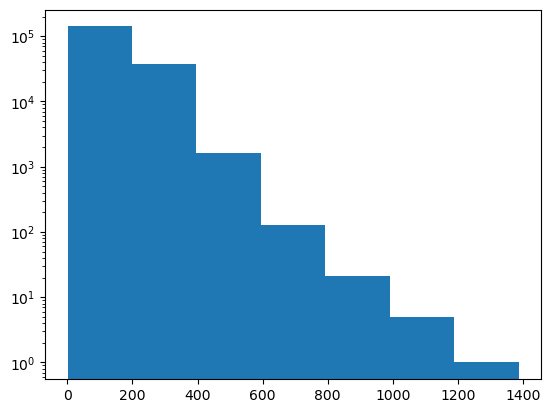

In [52]:
plt.hist(char_lens,bins=7)
plt.yscale("log")

In [53]:
output_seq_char_len = int(np.percentile(char_lens, 96))
output_seq_char_len

304

In [54]:
#get all keyboard values
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,output_sequence_length= output_seq_char_len, name = "char_vectorizer")

In [56]:
char_vectorizer.adapt(train_chars)

In [57]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [58]:
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
 c h r o n i c   h e p a t i t i s   b   p a t i e n t s   r e f r a c t o r y   t o   l a m i v u d i n e   c o m b i n e d   w i t h   a d v   h a v e   a   g o o d   r e s p o n s e   t o   i n f - @ b   m o n o t h e r a p y   a n d   c o m b i n e d   t h e r a p y   w i t h   e n t e c a v i r   a n d   a d v   ,   a n d   i n t e r f e r o n   t r e a t m e n t   i s   p r e f e r r e d   t o   r e d u c e   p o t e n t i a l   d r u g   r e s i s t a n c e   g e n e   m u t a t i o n s   .

Length of random_train_chars: 214

Vectorized chars:
 [[11 13  8  7  6  4 11 13  2 14  5  3  4  3  4  9 22 14  5  3  4  2  6  3
   9  8  2 17  8  5 11  3  7  8 19  3  7 12  5 15  4 21 16 10  4  6  2 11
   7 15 22  4  6  2 10 20  4  3 13  5 10 21 13  5 21  2  5 18  7  7 10  8
   2  9 14  7  6  9  2  3  7  4  6 17 22 15  7  6  7  3 13  2  8  5 14 19
   5  6 10 11  7 15 22  4  6  2 10  3 13  2  8  5 14 19 20  4  3 13  2  6
   3  2 11  5 21  4  8  5  6 10  5 10 21  5  6 10  4  6 

In [59]:
char_embed = layers.Embedding(input_dim=len(char_vocab), # number of different characters
                              output_dim=25, # this is the size of the char embedding in the paper: https://arxiv.org/pdf/1612.05251.pdf (Figure 1)
                              mask_zero=True,
                              name="char_embed")

In [60]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [61]:
#Create Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs) 
token_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)

#compile
model_3.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_char_dataset,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        epochs=3,
                        validation_data=val_char_dataset
                        ,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 7s 9ms/step - loss: 1.4593 - accuracy: 0.3483 - val_loss: 1.4091 - val_accuracy: 0.3983
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 1.3754 - accuracy: 0.4138 - val_loss: 1.3472 - val_accuracy: 0.4355
Epoch 3/3
562/562 [==============================] - 5s 10ms/step - loss: 1.3357 - accuracy: 0.4455 - val_loss: 1.3195 - val_accuracy: 0.4418


In [62]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=tf.argmax(model_3.predict(val_char_dataset), axis=1))
model_3_results

945/945 [==============================] - 3s 3ms/step


C:\Users\rishu.nand\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 44.34330729511453,
 'precision': 0.37654887627685163,
 'recall': 0.44343307295114526,
 'f1': 0.3876458637159499}

In [63]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs) 
token_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_3 = tf.keras.Model(inputs,outputs)

#compile
model_3.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_char_dataset,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        epochs=3,
                        validation_data=val_char_dataset
                        ,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 7s 10ms/step - loss: 1.2547 - accuracy: 0.4857 - val_loss: 1.1162 - val_accuracy: 0.5462
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 1.0821 - accuracy: 0.5618 - val_loss: 1.0204 - val_accuracy: 0.5888
Epoch 3/3
562/562 [==============================] - 5s 10ms/step - loss: 1.0085 - accuracy: 0.6000 - val_loss: 0.9626 - val_accuracy: 0.6144


In [64]:
#Create Model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) 
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_class, activation="softmax")(x)
model_1_1 = tf.keras.Model(inputs,outputs)

#compile
model_1_1.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_1_1 = model_1_1.fit(train_dataset,steps_per_epoch=int(0.1*len(train_dataset)),epochs=3,validation_data=valid_dataset,validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 85s 150ms/step - loss: 0.5855 - accuracy: 0.7895 - val_loss: 0.5578 - val_accuracy: 0.7985
Epoch 2/3
562/562 [==============================] - 84s 150ms/step - loss: 0.4889 - accuracy: 0.8243 - val_loss: 0.5469 - val_accuracy: 0.7962
Epoch 3/3
562/562 [==============================] - 84s 149ms/step - loss: 0.4649 - accuracy: 0.8330 - val_loss: 0.5440 - val_accuracy: 0.7995


In [65]:
model_1_1.evaluate(valid_dataset)

945/945 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7977


[0.5496786236763, 0.7976962924003601]

## Model 4

In [66]:
#setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs, outputs = token_outputs)

#setup char inputs/model
char_inputs = layers.Input(shape=(1,),dtype = tf.string , name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings= char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings) #Bi - LSTM
char_model = tf.keras.Model(inputs= char_inputs, outputs=char_bi_lstm)

#concatenate
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])

#create output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_Dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_Dense)
output_layer = layers.Dense(num_class,activation="softmax")(final_dropout)

#construct model with char and token input
model_4 = tf.keras.Model(inputs=[token_model.input,char_model.input],
                        outputs = output_layer,
                        name = "model_4_token_And-char_embedding")

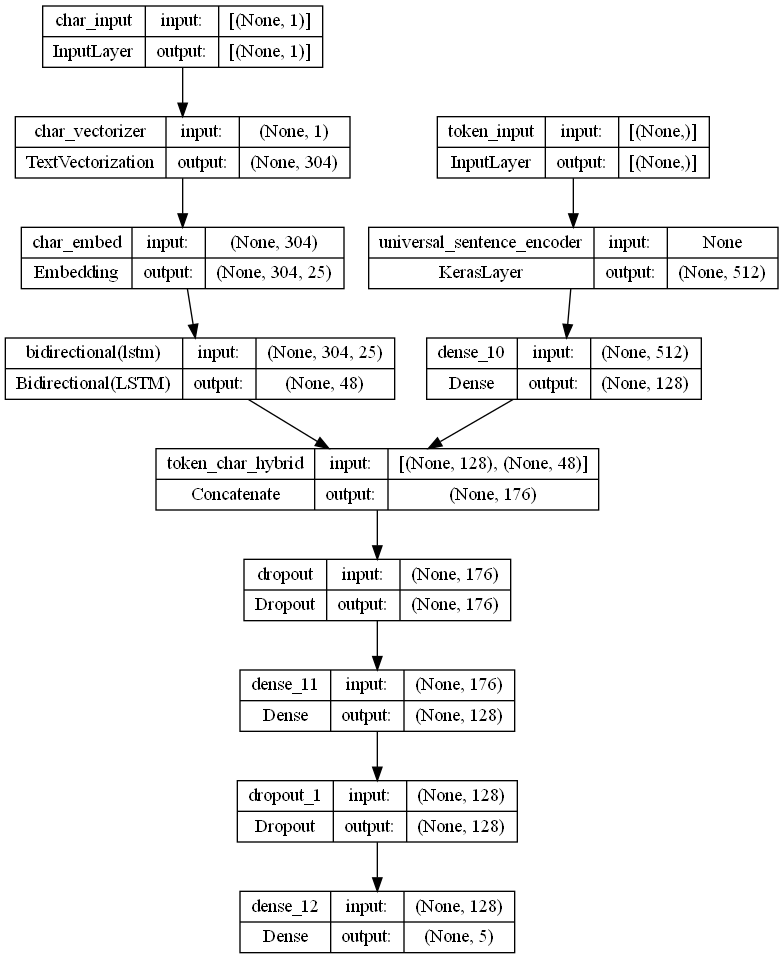

In [67]:
tf.keras.utils.plot_model(model_4,show_shapes=True)

In [68]:
model_4.compile(loss = "categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["Accuracy"])

In [69]:
#combine thw dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_label = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_token_label))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [70]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_label = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data,val_char_token_label))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [71]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [72]:
model_4.fit(train_char_token_dataset,steps_per_epoch=int(0.1*len(train_char_token_dataset)),epochs=3,validation_data=val_char_token_dataset,validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 54s 79ms/step - loss: 0.9846 - Accuracy: 0.6111 - val_loss: 0.7735 - val_Accuracy: 0.7041
Epoch 2/3
562/562 [==============================] - 41s 73ms/step - loss: 0.8011 - Accuracy: 0.6930 - val_loss: 0.7153 - val_Accuracy: 0.7304
Epoch 3/3
562/562 [==============================] - 41s 74ms/step - loss: 0.7745 - Accuracy: 0.7047 - val_loss: 0.6943 - val_Accuracy: 0.7394


## MODEL 5 = model4 +  Positional embedding

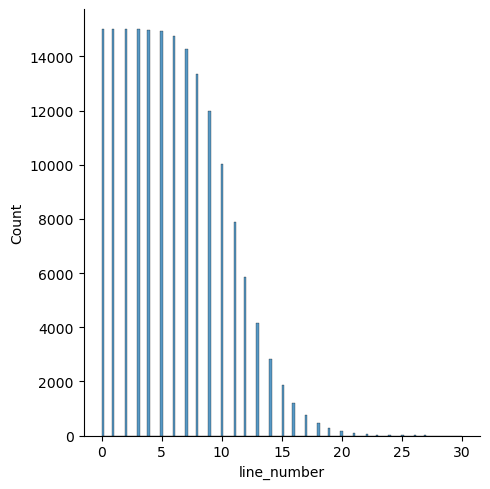

In [73]:
import seaborn as sns
sns.displot(train_df.line_number)

In [74]:
#one hot encoding
train_line_numbers_one_hot = tf.one_hot(train_df.line_number.to_numpy(),depth=20)
val_line_numbers_one_hot = tf.one_hot(val_df.line_number.to_numpy(),depth=20)
test_line_numbers_one_hot = tf.one_hot(test_df.line_number.to_numpy(),depth=20)
train_line_numbers_one_hot[:10],train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0

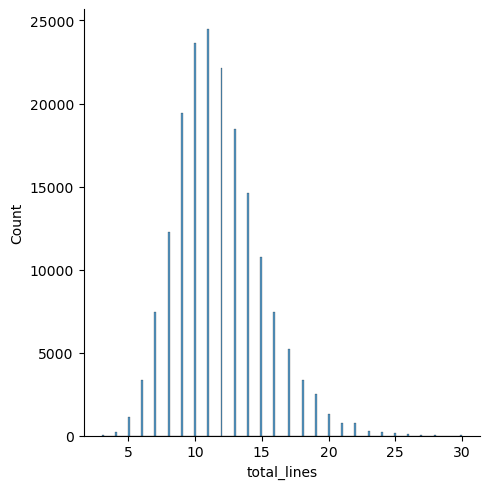

In [75]:
sns.displot(train_df.total_lines)

In [76]:
np.percentile(train_df.total_lines,98.6)

20.0

In [77]:
train_total_lines_one_hot = tf.one_hot(train_df.total_lines.to_numpy(),depth=20)
val_total_lines_one_hot = tf.one_hot(val_df.total_lines.to_numpy(),depth=20)
test_total_lines_one_hot = tf.one_hot(test_df.total_lines.to_numpy(),depth=20)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [78]:
# 1. token input
token_inputs = layers.Input(shape=[],dtype="string",name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,outputs=token_outputs)

#2.Char inputs
char_inputs = layers.Input(shape = (1,),dtype="string",name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs, outputs = char_bi_lstm)

#3.Line number model
number_inputs = layers.Input(shape=(20,),dtype=tf.float32, name="line_number_inputs")
number_outputs = layers.Dense(32,activation="relu")(number_inputs)
number_model=tf.keras.Model(inputs=number_inputs,outputs=number_outputs)

#4. total lines model
total_inputs = layers.Input(shape=(20,),dtype=tf.float32, name="total_line_inputs")
total_outputs = layers.Dense(32,activation="relu")(total_inputs)
total_model=tf.keras.Model(inputs=total_inputs,outputs=total_outputs)

#5. concatenate
combined_embeddings = layers.Concatenate(name="chat_token_hybrid_embedding")([token_model.output,char_model.output])

z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

#6. Combine postional with 5 
tribrid_embeddings = layers.Concatenate(name = "char_token_positional_embedding")([number_model.output,total_model.output,z])


#7. Create output layers
output_layer = layers.Dense(5,activation = "softmax",name="output_layer")(tribrid_embeddings)

#8. Put everything together
model_5 = tf.keras.Model(inputs = [number_model.input,total_model.input,token_model.input,char_model.input],outputs=output_layer
                        ,name="tribrid_model_5")

In [79]:
model_5.summary()

Model: "tribrid_model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 304)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0

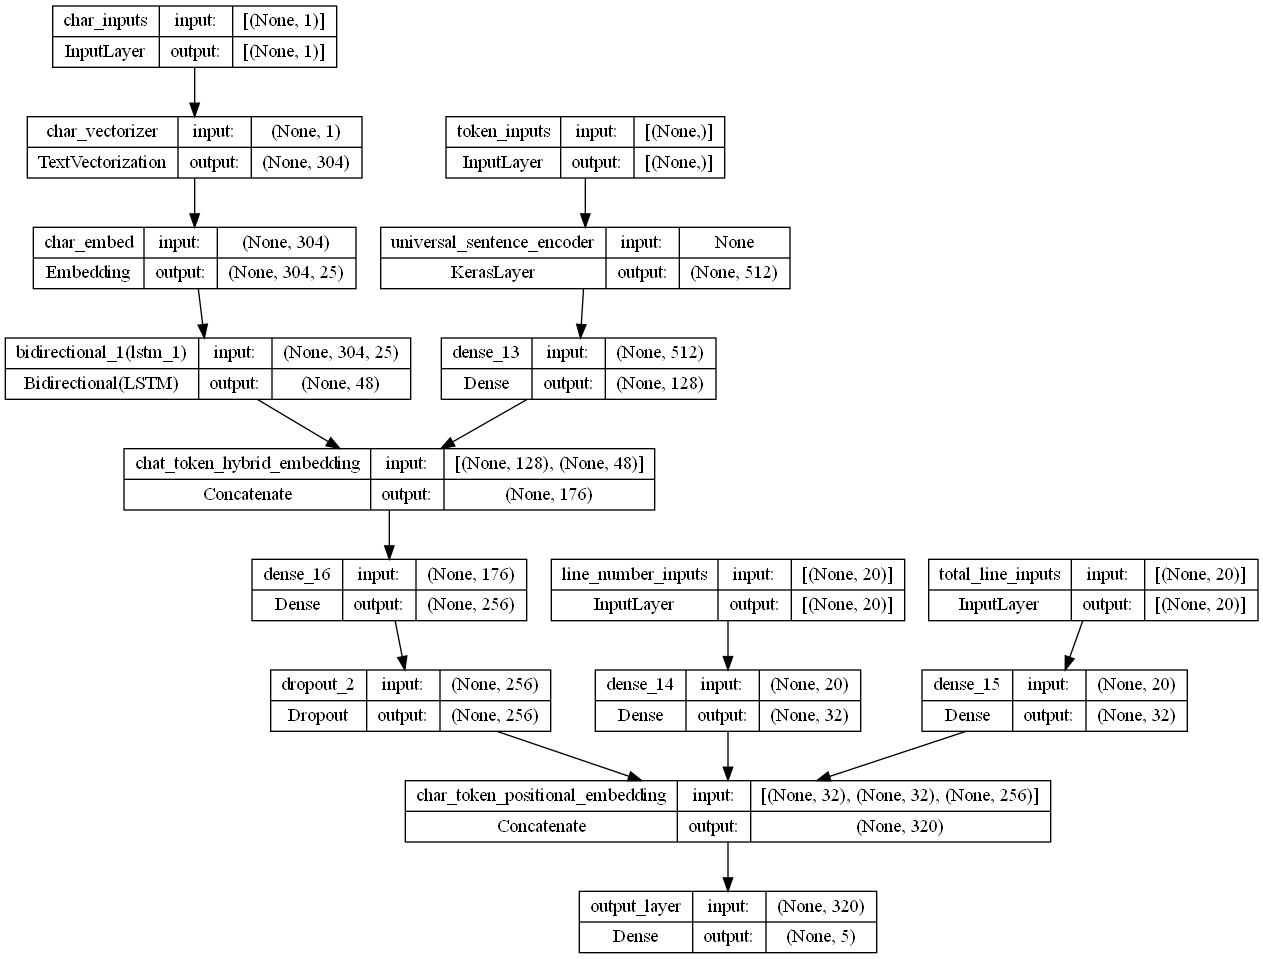

In [80]:
tf.keras.utils.plot_model(model_5,show_shapes=True)

In [81]:
#compile model 5
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [82]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,train_total_lines_one_hot,
                                                                     train_sentences, train_chars))
train_char_token_pos_label = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_label))

train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [83]:
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,val_total_lines_one_hot,
                                                                     val_sentences, val_chars))
val_char_token_pos_label = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_label))

val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [84]:
test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,test_total_lines_one_hot,
                                                                     test_sentences, test_chars))
test_char_token_pos_label = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_label))

test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [85]:
train_char_token_pos_dataset, val_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [86]:
#fit
history_model_5 = model_5.fit(train_char_token_pos_dataset,steps_per_epoch = int(0.1*len(train_char_token_pos_dataset)),epochs=3,
                             validation_data=val_char_token_pos_dataset, validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 53s 78ms/step - loss: 1.0918 - accuracy: 0.7297 - val_loss: 0.9799 - val_accuracy: 0.8072
Epoch 2/3
562/562 [==============================] - 40s 72ms/step - loss: 0.9650 - accuracy: 0.8169 - val_loss: 0.9485 - val_accuracy: 0.8328
Epoch 3/3
562/562 [==============================] - 41s 72ms/step - loss: 0.9463 - accuracy: 0.8266 - val_loss: 0.9376 - val_accuracy: 0.8311


In [87]:
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred= tf.argmax(model_5.predict(val_char_token_pos_dataset, verbose=1), axis=1))
model_5_results

945/945 [==============================] - 22s 20ms/step


{'accuracy': 83.5661326625182,
 'precision': 0.8347831646337993,
 'recall': 0.835661326625182,
 'f1': 0.8347509126015227}

In [88]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred= tf.argmax(model_4.predict(val_char_token_dataset, verbose=1), axis=1))
model_4_results

945/945 [==============================] - 22s 20ms/step


{'accuracy': 73.15305176750961,
 'precision': 0.7315796365595717,
 'recall': 0.731530517675096,
 'f1': 0.7297443757680103}

In [89]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"model_0_baseline": baseline_results,
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_char_token_embedding": model_4_results,
                                  "model_5_pos_char_token_embedding": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.270224,0.779132,0.782702,0.780193
model_2_pretrained_token_embedding,77.058785,0.768095,0.770588,0.766544
model_3_custom_char_embedding,44.343307,0.376549,0.443433,0.387646
model_4_hybrid_char_token_embedding,73.153052,0.731580,0.731531,0.729744
model_5_pos_char_token_embedding,83.566133,0.834783,0.835661,0.834751


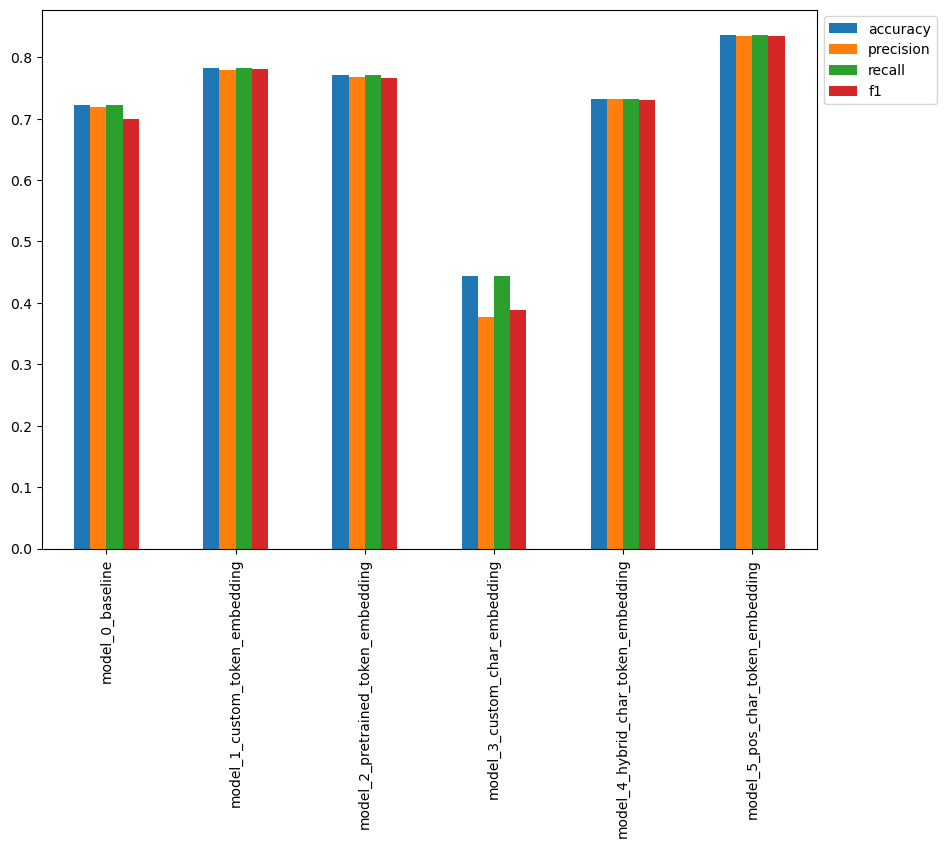

In [90]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
(all_model_results).plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

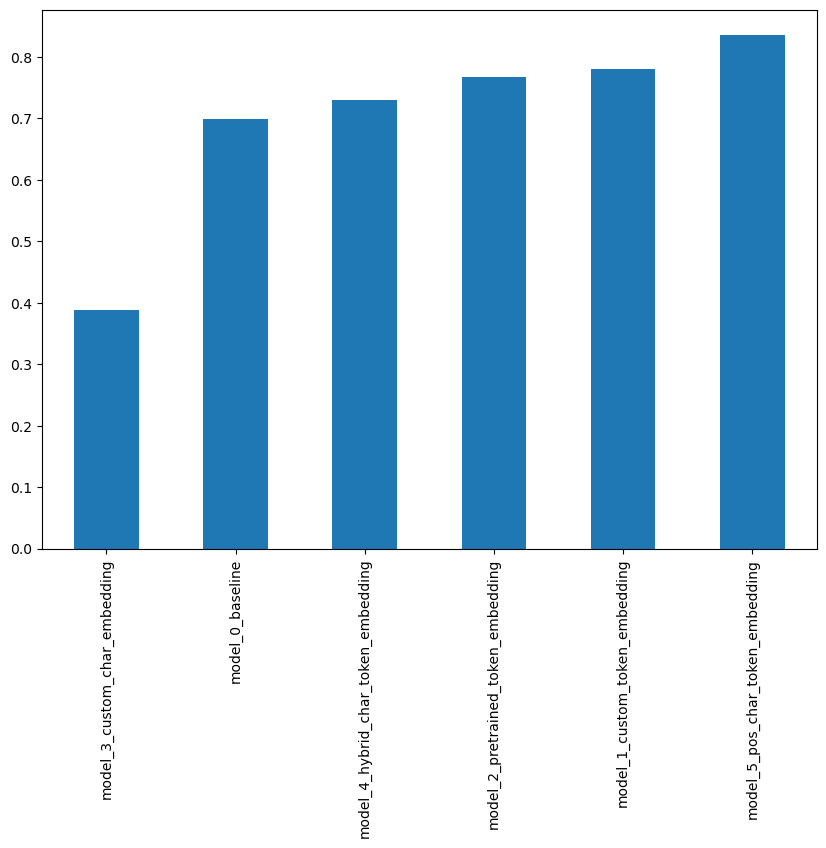

In [91]:
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7));

In [92]:
#model_5.save("skimlit_model_5")

In [93]:
loaded_model = tf.keras.models.load_model("skimlit_model_5")


In [94]:
loaded_model_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred= tf.argmax(loaded_model.predict(val_char_token_pos_dataset, verbose=1), axis=1))
loaded_model_results

945/945 [==============================] - 23s 21ms/step


{'accuracy': 83.44035482589699,
 'precision': 0.8334749324734098,
 'recall': 0.8344035482589699,
 'f1': 0.8336408129751621}

In [95]:
model_5_results == loaded_model_results

False

In [96]:
model_5_results

{'accuracy': 83.5661326625182,
 'precision': 0.8347831646337993,
 'recall': 0.835661326625182,
 'f1': 0.8347509126015227}

## Model 6

In [97]:
# 1. token input
token_inputs = layers.Input(shape=[], dtype=tf.string)
text_vectors = text_vectorizer(token_inputs)
token_embeddings = token_embed(text_vectors)
#token_outputs = layers.Dense(128,activation="relu")(token_embeddings)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector from conv layer
token_outputs = layers.Dense(num_class, activation="softmax")(x)
token_model = tf.keras.Model(inputs = token_inputs,outputs=token_outputs)

#2.Char inputs
char_inputs = layers.Input(shape = (1,),dtype="string",name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs, outputs = char_bi_lstm)

#3.Line number model
number_inputs = layers.Input(shape=(20,),dtype=tf.float32, name="line_number_inputs")
number_outputs = layers.Dense(32,activation="relu")(number_inputs)
number_model=tf.keras.Model(inputs=number_inputs,outputs=number_outputs)

#4. total lines model
total_inputs = layers.Input(shape=(20,),dtype=tf.float32, name="total_line_inputs")
total_outputs = layers.Dense(32,activation="relu")(total_inputs)
total_model=tf.keras.Model(inputs=total_inputs,outputs=total_outputs)

#5. concatenate
combined_embeddings = layers.Concatenate(name="chat_token_hybrid_embedding")([token_model.output,char_model.output])

z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

#6. Combine postional with 5 
tribrid_embeddings = layers.Concatenate(name = "char_token_positional_embedding")([number_model.output,total_model.output,z])


#7. Create output layers
output_layer = layers.Dense(5,activation = "softmax",name="output_layer")(tribrid_embeddings)

#8. Put everything together
model_6 = tf.keras.Model(inputs = [number_model.input,total_model.input,token_model.input,char_model.input],outputs=output_layer
                        ,name="tribrid_model_5")

In [99]:
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [100]:
history_model_6 = model_6.fit(train_char_token_pos_dataset,steps_per_epoch = int(0.1*len(train_char_token_pos_dataset)),epochs=3,
                             validation_data=val_char_token_pos_dataset, validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 116s 190ms/step - loss: 1.0332 - accuracy: 0.7630 - val_loss: 0.9417 - val_accuracy: 0.8178
Epoch 2/3
562/562 [==============================] - 105s 186ms/step - loss: 0.8864 - accuracy: 0.8659 - val_loss: 0.9292 - val_accuracy: 0.8142
Epoch 3/3
562/562 [==============================] - 105s 187ms/step - loss: 0.8697 - accuracy: 0.8723 - val_loss: 0.9196 - val_accuracy: 0.8318


In [102]:
calculate_results(y_true=val_labels_encoded,
                                    y_pred= tf.argmax(model_6.predict(val_char_token_pos_dataset, verbose=1), axis=1))

945/945 [==============================] - 21s 19ms/step


{'accuracy': 82.6923076923077,
 'precision': 0.8274653549741268,
 'recall': 0.8269230769230769,
 'f1': 0.8260559364080001}

In [103]:
model_6.fit(train_char_token_pos_dataset,steps_per_epoch = len(train_char_token_pos_dataset),epochs=3,
                             validation_data=val_char_token_pos_dataset, validation_steps=len(val_char_token_pos_dataset))

Epoch 1/3
5627/5627 [==============================] - 1047s 186ms/step - loss: 0.8831 - accuracy: 0.8676 - val_loss: 0.8823 - val_accuracy: 0.8627
Epoch 2/3
5627/5627 [==============================] - 1047s 186ms/step - loss: 0.8516 - accuracy: 0.8904 - val_loss: 0.8852 - val_accuracy: 0.8589
Epoch 3/3
5627/5627 [==============================] - 1012s 180ms/step - loss: 0.8250 - accuracy: 0.9104 - val_loss: 0.8965 - val_accuracy: 0.8507


In [104]:
calculate_results(y_true=val_labels_encoded,
                                    y_pred= tf.argmax(model_6.predict(val_char_token_pos_dataset, verbose=1), axis=1))

945/945 [==============================] - 17s 18ms/step


{'accuracy': 85.06884681583476,
 'precision': 0.8512449645570652,
 'recall': 0.8506884681583476,
 'f1': 0.849228757588506}

In [105]:
model_5.fit(train_char_token_pos_dataset,steps_per_epoch = len(train_char_token_pos_dataset),epochs=3,
                             validation_data=val_char_token_pos_dataset, validation_steps=len(val_char_token_pos_dataset))

Epoch 1/3
5627/5627 [==============================] - 433s 77ms/step - loss: 0.9234 - accuracy: 0.8453 - val_loss: 0.9048 - val_accuracy: 0.8520
Epoch 2/3
5627/5627 [==============================] - 443s 79ms/step - loss: 0.9043 - accuracy: 0.8584 - val_loss: 0.8978 - val_accuracy: 0.8551
Epoch 3/3
5627/5627 [==============================] - 439s 78ms/step - loss: 0.8938 - accuracy: 0.8656 - val_loss: 0.8965 - val_accuracy: 0.8559


In [106]:
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred= tf.argmax(model_5.predict(val_char_token_pos_dataset, verbose=1), axis=1))
model_5_results

945/945 [==============================] - 20s 21ms/step


{'accuracy': 85.58519793459553,
 'precision': 0.8583001820066707,
 'recall': 0.8558519793459552,
 'f1': 0.8529075223261382}

In [107]:
model_5.save('SKIMLIT_FINAL')

INFO:tensorflow:Assets written to: SKIMLIT_FINAL\assets


INFO:tensorflow:Assets written to: SKIMLIT_FINAL\assets
